<a href="https://colab.research.google.com/github/MarAmorosMtz/SamsungInnovationCampus/blob/main/PrediccionSigmode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa las librerias numpy y matplotlib
necesarias para calculos matemáticos y graficacion respectivamente

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Define una funcion sigmoide, devuelve un valor entre 0 y 1

$$
\frac{1}{1 + e ^{-z}}
$$

donde

$$
\ z = wx+b
$$


In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

La funcion compute_gradients ajusta los gradientes para actualizar los parámtros del modelo. Los gradientes representan cómo cambia la la perdida con respecto a cada valor real para minimizar el error.

La formula calcula la sumatoria de las diferencias entre el valor real y el obtenido, multiplicado por el muestreo y se normaliza entre 1 y 0 multiplicando todo por 1/m

$$
\frac{1}{m}\sum_{i = 1}^m (y^ipred - y^i)x^i
$$

In [97]:
def probabilidad(x, w, b):
  return sigmoid(w*x+b)

def compute_gradients(horas, y, y_pred):
    m = len(y)  #Numero de muestras en el conjunto de datos
    dw = 1 / m * np.sum((y_pred - y) * horas)
    db = 1 / m * np.sum(y_pred - y)
    return dw, db

La siguiente funcion ajusta los valores del sesgo y el peso (w, b) recibiendo el ratio de aprendizaje y el numero de iteraciones. Calcula ypred utilizando la funcion de la sigmoide con los valores actuales de w y b, luego computa el cambio que debe de haber en funcion de que tan diferente es de el valor real que deberia de tener segun los datos de entrenamiento proporcionados. Ajusta los valores de w y b repite el proceso. Finalmente regresa los valores de w y b ajustados al minimo error

In [71]:
def entrenamiento(horas, aprobado, aprendizaje, iteraciones):
  w, b= 0, 0
  for i in range(iteraciones):
    prediccion = probabilidad(horas, w, b)

    dw, db = compute_gradients(horas, aprobado, prediccion)

    w -= aprendizaje * dw
    b -= aprendizaje * db

  return w, b

Declara dos arreglos, uno con las horas de entrada y otro con 1 y 0 representando si con dichas horas se aprobó o no. Esto como datos de entrenamiento o base.

Despues se declara el ratio de aprendizaje a 0.1 y se ajustan los valores de w y b con 10,000 iteraciones.

Despues, se define una secuencia de 100 numeros igualmente espaciados de 0 a 8 y se guarda en la variable grafico.
Se calcula la sigmoide de ese vector de valores y se guarda en curva

In [99]:
horas = np.array([1, 2, 3, 4, 5, 6, 7])
aprobado = np.array([0, 0, 0, 1, 1, 1, 1])

aprendizaje = 0.1
iteraciones = 10000

w, b = entrenamiento(horas, aprobado, aprendizaje, iteraciones)

print(w, b)

grafico = np.linspace(0, 8, 100)
curva = probabilidad(grafico, w, b)

3.9369206654932336 -13.621232341583791


Primero, se grafica con puntos en funcion de las horas estudiadas y si aprobó o no.

Despues se grafica la funcion sigmoide de los valores calculados previamente.

Se agregan las etiquetas pertinentes

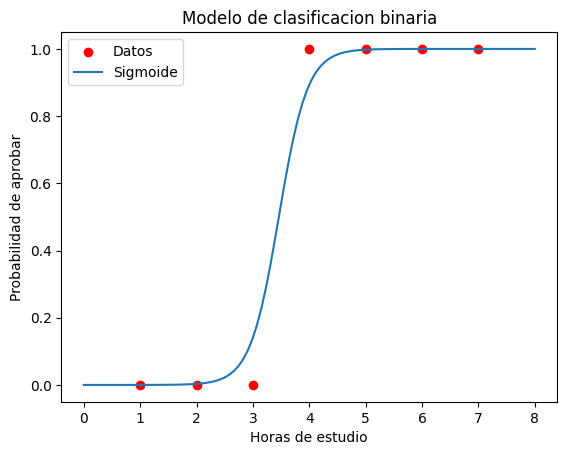

In [94]:
plt.scatter(horas, aprobado, color = 'red', label='Datos')
plt.plot(grafico, curva, label='Sigmoide')
plt.xlabel('Horas de estudio')
plt.ylabel('Probabilidad de aprobar')
plt.title('Modelo de clasificacion binaria')
plt.legend()
plt.show()

Finalmente, utilizando los valores ajustados de w y b se puede pedir al usuario ingresar sus horas de estudio y calcular la probabilidad de con estas apruebe.


In [95]:
entrada = float(input('Ingrese sus horas de estudio: '))
prob = probabilidad(entrada, w, b)
print(f'La probabilidad de aprobar es: {prob*100:.2f}%')

Ingrese sus horas de estudio: 3.9
La probabilidad de aprobar es: 84.98%
